In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def coordination(ftraj, boxl, r_cut = 3.0):
	N = ftraj.shape[1]
	C = np.zeros(ftraj.shape[0])
	for i in range(N):
		#if i % 10 == 0: print(i)
		for j in range(N):
			if i == j: pass
			tmp = ftraj[:,i,:] - ftraj[:,j,:]
			rij = np.linalg.norm(tmp, axis = 1)
			rij = rij - boxl * np.rint(2 * rij/boxl)
			C = C + (1 - (rij / r_cut)**6) / (1 - (rij / r_cut)**12)
	return C / N

def fit_power(x, a, b):
    return a*(np.abs(x)**b)

def linfit(x, a, b):
    return a * x + b

In [77]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [9]:
tm_orientations = np.transpose(np.load('criticalnstep_100_bs_512_lr_0.01_coords_redo_short.npy'), (0,1,3,2))

In [11]:
orientations_list = []
e_list = []
T_list = np.array([1.5, 1.55, 1.6, 1.65, 1.7, 1.73, 1.76, 1.8, 1.85, 1.9, 1.95, 2.  ])
for i, T in enumerate(T_list):
    orientations_list.append(np.load('%sT/orientations.npy' % T)[1000:,:320,:])
    e_list.append(np.load('%sT/e.npy' % T)[1000:10000])
    print(len(orientations_list[i]), len(e_list[i]))
orientations = np.array(orientations_list)
U = np.array(e_list)
print(orientations.shape, U.shape)

9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
9000 9000
(12, 9000, 320, 3) (12, 9000)


In [12]:
# import the distances to get the approximate (maybe) energies of each configuration
# inferred from TM

distance_list = []

for i, T in enumerate(T_list):
    distance_list.append(np.load('%sT/dist_list.npy' % T))

In [13]:
distance_list = np.array(distance_list)

In [14]:
min_dist = distance_list.argmax(1)

In [15]:
tm_U = []
for i in range(U.shape[0]):
    tm_U.append(U[i][min_dist[i]])
tm_U = np.array(tm_U)

0
1
2
3
4
5
6
7
8
9
10
11


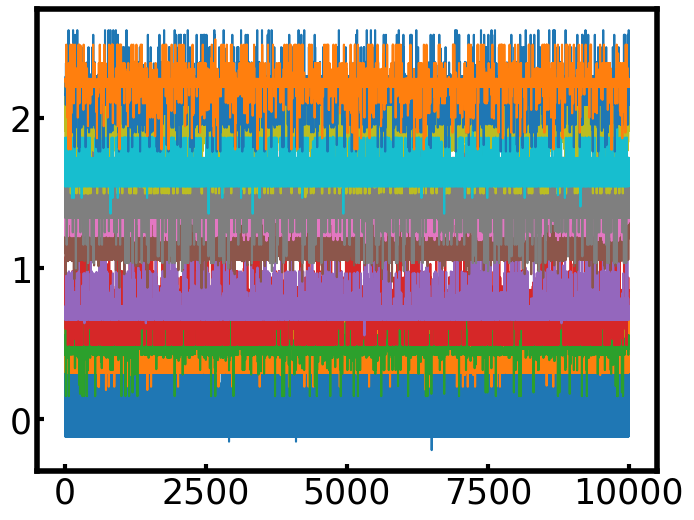

In [16]:
for i in range(U.shape[0]):
    print(i)
    plt.plot(tm_U[i,:])
plt.show()
plt.close()

In [17]:
avg_tm_U = tm_U.mean(1)
std_tm_U = tm_U.std(1)

<ErrorbarContainer object of 3 artists>

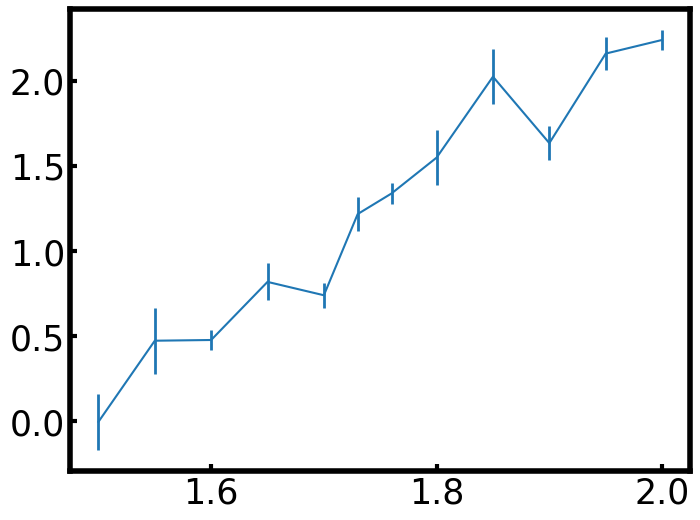

In [78]:
plt.errorbar(T_list, avg_tm_U, yerr = std_tm_U, elinewidth = 2)

In [19]:
avg_U = U.mean(1)
std_U = U.std(1)

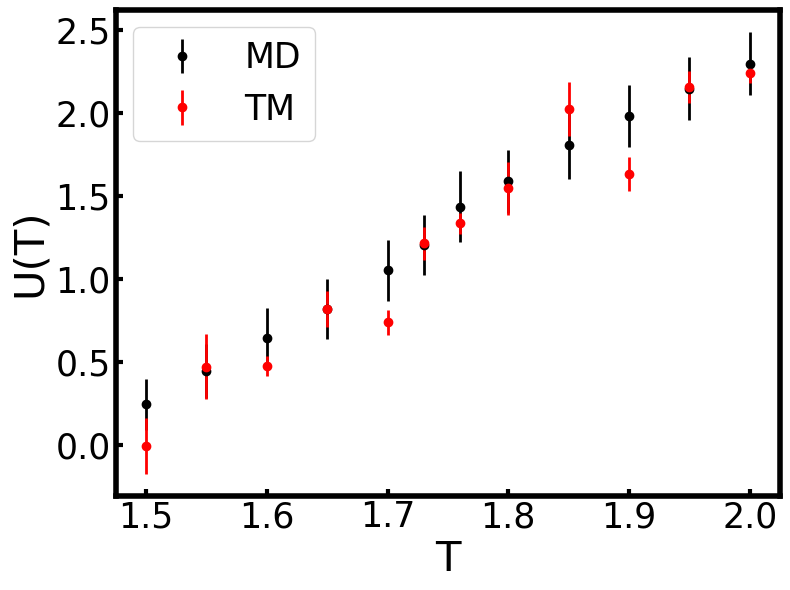

In [117]:
plt.errorbar(T_list, avg_U, yerr = std_U, elinewidth = 2, lw = 0, c = 'k', capthick = True, label = 'MD',
            marker = 'o')
plt.errorbar(T_list, avg_tm_U, yerr = std_tm_U, elinewidth = 2, lw = 0, c = 'r', capthick = True, label = 'TM',
            marker = 'o')
plt.legend()
plt.xlabel('T')
plt.ylabel('U(T)')
plt.tight_layout()
plt.savefig('U_MD_TM.pdf', dpi = 300)
plt.show()
plt.close()

In [23]:
dU = np.zeros_like(U)
dUdT_md = np.zeros_like(U)
for i in range(U.shape[0]):
    print(i)
    if (i == 0):
        dU[i,:] = U[i + 1,:] - U[i,:]
        dUdT_md[i,:] = (U[i + 1,:] - U[i,:]) / (T_list[i+1] - T_list[i])
    elif (i == U.shape[0] - 1):
        dU[i,:] = U[-1,:] - U[-2,:]
        dUdT_md[i,:] = (U[-1,:] - U[-2,:]) / (T_list[-2] - T_list[-1])
    else:
        dU[i,:] = (U[i + 1,:] - U[i - 1,:]) / 2
        dUdT_md[i,:] = (U[i + 1,:] - U[i - 1,:]) / 2 / (T_list[i+1] - T_list[i-1])

ddU = dU.std(1)

0
1
2
3
4
5
6
7
8
9
10
11


In [24]:
Cv = np.gradient(avg_U, T_list)
dCv = abs(Cv) * abs(ddU / np.mean(dU, axis = 1))
md_ddUdT = dUdT_md.std(1)

In [93]:
np.where(dUdT_md > 0)[0].shape

(92901,)

In [100]:
dUdT_md[dUdT_md > 0]

array([8.1844032, 1.1639558, 0.448739 , ..., 0.03595  , 0.660462 ,
       1.716394 ])

In [103]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x an

In [102]:
np.where(dUdT_md > 0)[0]

array([ 0,  0,  0, ..., 11, 11, 11])

In [105]:
log_Cv = np.zeros(dUdT_md.shape[0])
for i in range(len(log_Cv)):
    log_Cv[i] = np.mean(np.log(dUdT_md[i,dUdT_md[i,:] > 0]))
dlog_Cv = dUdT_md.std(1) * abs(1 / dUdT_md.mean(1))

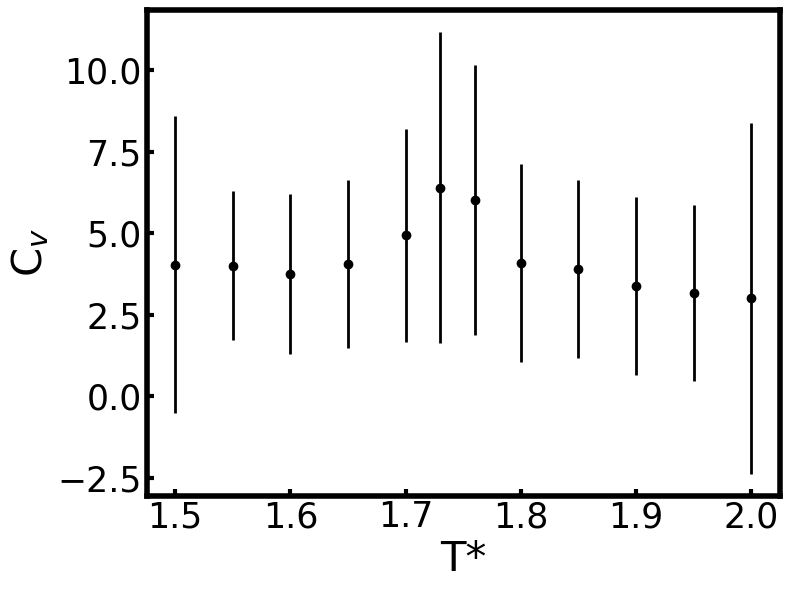

In [25]:
plt.errorbar(T_list, Cv, yerr = dCv, marker = 'o', c = 'k', lw = 0, capthick = True, elinewidth = 2)
plt.ylabel(r'C$_v$')
plt.xlabel('T*')
plt.tight_layout()
plt.show()
plt.close()

In [26]:
tm_dU = np.zeros_like(tm_U)
dUdT_tm = np.zeros_like(tm_U)
for i in range(U.shape[0]):
    print(i)
    if (i == 0):
        tm_dU[i,:] = tm_U[i + 1,:] - tm_U[i,:]
        dUdT_tm[i,:] = (tm_U[i + 1,:] - tm_U[i,:]) / (T_list[i+1] - T_list[i])
    elif (i == U.shape[0] - 1):
        tm_dU[i,:] = tm_U[-1,:] - tm_U[-2,:]
        dUdT_tm[i,:] = (tm_U[-1,:] - tm_U[-2,:]) / (T_list[-2] - T_list[-1])
    else:
        tm_dU[i,:] = (tm_U[i + 1,:] - tm_U[i - 1,:]) / 2
        dUdT_tm[i,:] = (tm_U[i + 1,:] - tm_U[i - 1,:]) / 2 / (T_list[i+1] - T_list[i-1])

tm_ddU = tm_dU.std(1)

0
1
2
3
4
5
6
7
8
9
10
11


In [30]:
Cv_tm = np.gradient(avg_tm_U, T_list)
dCv_tm = abs(Cv_tm) * abs(tm_ddU / np.mean(tm_dU, axis = 1))
tm_ddUdT = dUdT_tm.std(1)

In [ ]:
mean_tm_S = tm_samples.mean(1)
std_tm_S = tm_samples.std(1)

mean_tm_log_S = np.log(tm_samples).mean(1)
std_tm_log_S = tm_samples.std(1) * abs(1 / tm_samples.mean(1))

In [106]:
log_Cv_tm = np.zeros(dUdT_tm.shape[0])
for i in range(len(log_Cv_tm)):
    log_Cv_tm[i] = np.mean(np.log(dUdT_tm[i,dUdT_tm[i,:] > 0]))
dlog_Cv_tm = dUdT_tm.std(1) * abs(1 / dUdT_tm.mean(1))

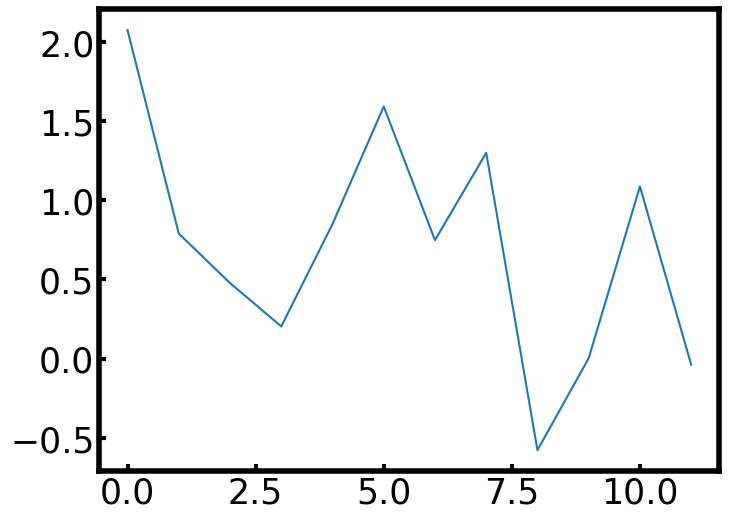

In [107]:
plt.plot(log_Cv_tm)

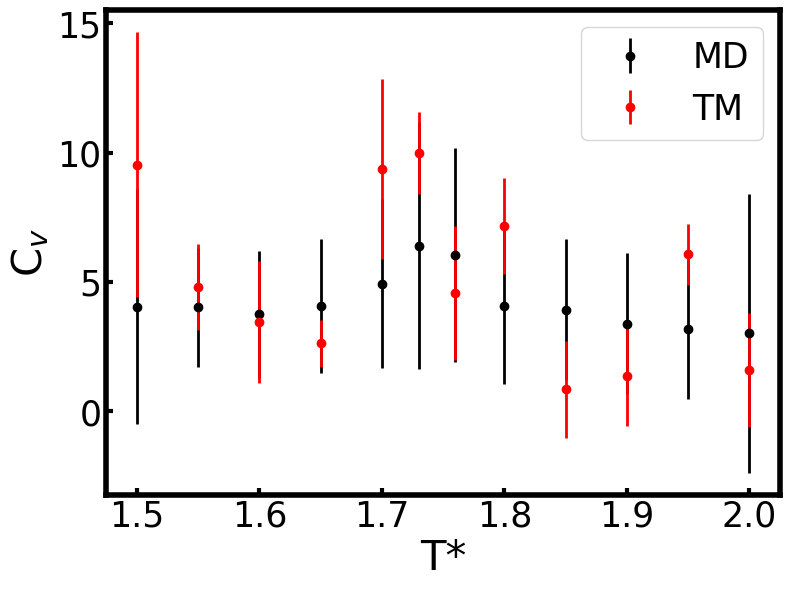

In [118]:
plt.errorbar(T_list, Cv, yerr = dCv, marker = 'o', c = 'k', lw = 0, capthick = True, elinewidth = 2, 
             label = 'MD')
plt.errorbar(T_list, Cv_tm, yerr = dCv_tm, marker = 'o', c = 'r', lw = 0, capthick = True, elinewidth = 2,
            label = 'TM')

plt.ylabel(r'C$_v$')
plt.xlabel('T*')
plt.legend()
plt.tight_layout()
plt.savefig('Cv_MD_TM.pdf', dpi = 300)
plt.show()
plt.close()

In [32]:
# fit!

T_star = np.concatenate([np.log((1.74 - np.array(T_list)[:6])), np.log((np.array(T_list)[6:] - 1.74))])
log_T_star = np.log(abs(T_star))

In [53]:
# ah! need to change to Cv instead of U...
mean_U = U.mean(1)
std_U = U.std(1)

mean_log_U = np.log(U - U.min() + 1e-9).mean(1)
std_log_U = (U - U.min() + 1e-9).std(1) * abs(1 / (U - U.min() + 1e-9).mean(1))


mean_tm_U = tm_U.mean(1)
std_tm_U = tm_U.std(1)

mean_tm_log_U = np.log(tm_U - U.min() + 1e-9).mean(1)
std_tm_log_U = (tm_U - U.min() + 1e-9).std(1) * abs(1 / (tm_U - U.min() + 1e-9).mean(1))

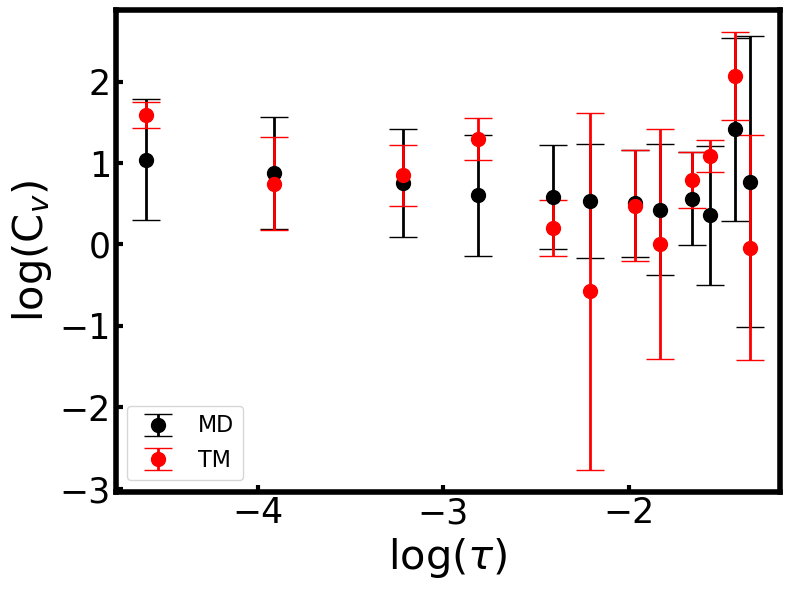

In [108]:
plt.errorbar(T_star, log_Cv, yerr = dlog_Cv, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, log_Cv_tm, yerr = dlog_Cv_tm, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.scatter(T_star[2], mean_log_U[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
#plt.scatter(T_star[-3], mean_log_U[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
#           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(C$_v$)')
plt.tight_layout()
#plt.savefig('magnetization_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [109]:
top_branch = T_star[:6]
bottom_branch = T_star[6:]

In [110]:
from scipy import optimize

In [111]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, log_Cv[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, log_Cv_tm[:6])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, log_Cv[6:])
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, log_Cv_tm[6:])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[-0.02658854  0.74239616] [0.14840842 0.41104601]
[-0.07287647  0.81116062] [0.29349993 0.81290514]

[-0.12188822  0.31739086] [0.0852535 0.2079552]
[-0.26669639 -0.1883299 ] [0.3621376  0.88334669]


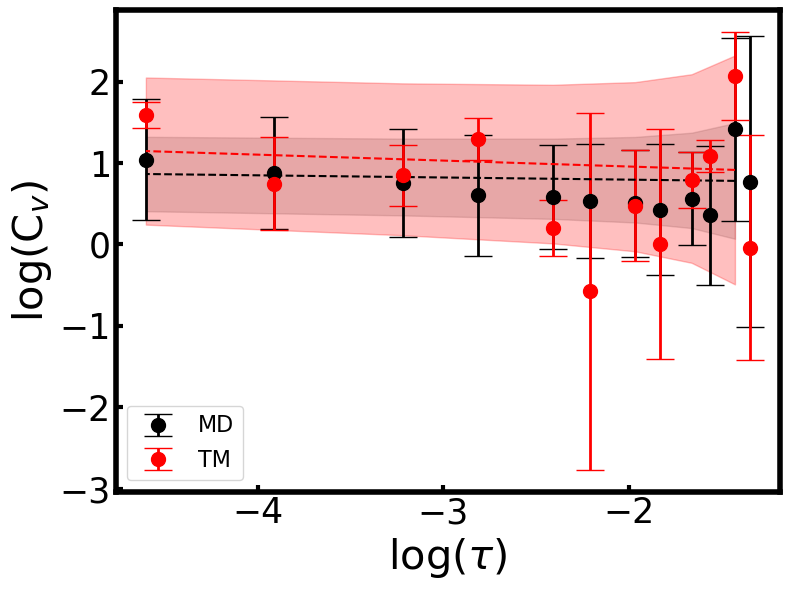

In [112]:
plt.errorbar(T_star, log_Cv, yerr = dlog_Cv, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, log_Cv_tm, yerr = dlog_Cv_tm, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[6:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[6:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[6:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[6:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
#plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
#plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
#           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(C$_v$)')
plt.tight_layout()
plt.savefig('critical_Cv_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

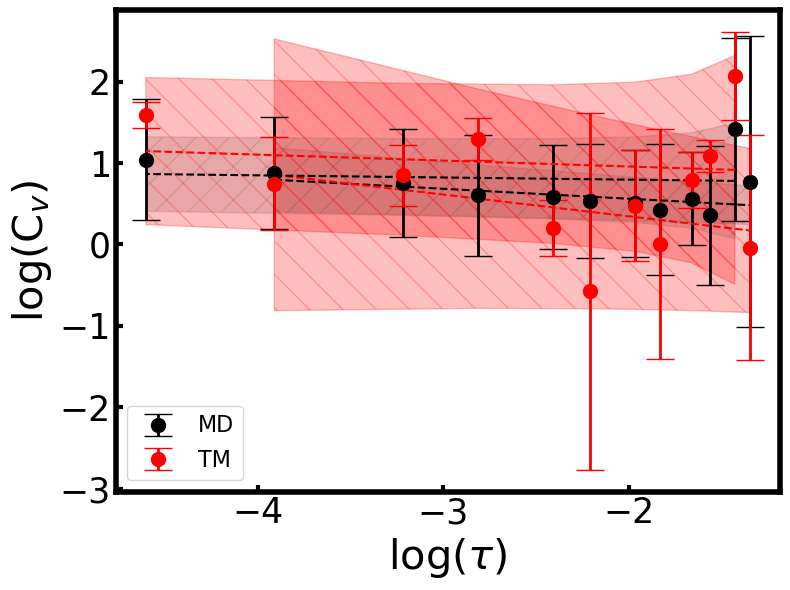

In [113]:
plt.errorbar(T_star, log_Cv, yerr = dlog_Cv, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, log_Cv_tm, yerr = dlog_Cv_tm, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[6:],
                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[6:], color = 'grey',
                alpha = 0.25, hatch = '/')
plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[6:],
                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[6:], color = 'r',
                alpha = 0.25, hatch = '\\')
plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[6:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[6:], color = 'grey',
                alpha = 0.25, hatch = '/')
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[6:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[6:], color = 'r',
                alpha = 0.25, hatch = '\\')
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
#plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
#plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
#           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(C$_v$)')
plt.tight_layout()
plt.savefig('critical_Cv_tm_md_comparison_fit.pdf', dpi = 300)
plt.show()
plt.close()